# MURA project deep learning

### Updates - 04/20/2019
1. Reshaping the images to be of size 512x512 which is the size used in most of the MURA implementaions on github.
2. Reshaping is done by black padding the images so that the original image stays in the center.

In [0]:
from collab_utils import GoogleDrive
drive = GoogleDrive()

Dataset and competition page - https://stanfordmlgroup.github.io/competitions/mura/

In [0]:
# Import necessary libraries

# Numerical computation
import numpy as np

# Data manipulation
import pandas as pd

# Deep Learning libraries
import tensorflow as tf
from tensorflow.python import keras

# Data Viz
import matplotlib.pyplot as plt
%matplotlib inline

# Operating system lib
import os

In [0]:
# Download the MURA dataset
# Reference -
from urllib.request import urlretrieve
from zipfile import ZipFile

def download(url, file):
    if not os.path.isfile(file):
        print("Download file... " + file + " ...")
        urlretrieve(url,file)
        print("File downloaded")

download('https://cs.stanford.edu/group/mlgroup/MURA-v1.1.zip','MURA.zip')
print("All the files are downloaded")

All the files are downloaded


In [0]:
drive.download_file('MURA.zip','MURA.zip')

In [0]:
# Unzip the file
!unzip MURA.zip

Output hidden; open in https://colab.research.google.com to view.

In [0]:
# Change working directory and display the files and folders within the MURA-v1.1 directory
os.chdir('MURA-v1.1')
os.listdir()

['valid_image_paths.csv',
 'train_image_paths.csv',
 'train',
 'valid',
 'train_labeled_studies.csv',
 'valid_labeled_studies.csv']

In [0]:
# Load the csv file as a pandas df containing the training image paths
train_image_paths = pd.read_csv('train_image_paths.csv',header=None)
train_image_paths.columns = ['image_path']
train_image_paths.head(5)

# Load the csv file as a pandas df containing the validation image paths
valid_image_paths = pd.read_csv('valid_image_paths.csv',header=None)
valid_image_paths.columns = ['image_path']
valid_image_paths.head(5)

,image_path
0,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...
1,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...
2,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...
3,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...
4,MURA-v1.1/valid/XR_WRIST/patient11186/study1_p...


In [0]:
# Load the csv file as a pandas df containing the training study labels
train_labelled_studies = pd.read_csv('train_labeled_studies.csv',header=None)
train_labelled_studies.columns = ['study_name','label']
train_labelled_studies.head(5)

# Load the csv file as a pandas df containing the validation study labels
valid_labelled_studies = pd.read_csv('valid_labeled_studies.csv',header=None)
valid_labelled_studies.columns = ['study_name','label']
valid_labelled_studies.head(5)

,study_name,label
0,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,1
1,MURA-v1.1/valid/XR_WRIST/patient11186/study1_p...,1
2,MURA-v1.1/valid/XR_WRIST/patient11186/study2_p...,1
3,MURA-v1.1/valid/XR_WRIST/patient11186/study3_p...,1
4,MURA-v1.1/valid/XR_WRIST/patient11187/study1_p...,1


In [0]:
# Go back one directory to the parent
os.chdir('..')

In [0]:
def addImageLists(df):
  """
  Function which takes a studies dataframe (train or valid) and returns the dataframe after adding a new column containing lists of images in that study
  """
  # Our column containing a list of images for each study
  images = []

  for study_name in df['study_name']:
    image_list = [study_name+image_name for image_name in os.listdir(study_name)]
    images.append(image_list)
    
  # Add the column and return the dataframe
  df['images'] = images
  return df
  

In [0]:
# Create the new train_labelled_studies df for EDA
train_labelled_studies = addImageLists(train_labelled_studies)
# Create the new valid_labelled_studies df for EDA
valid_labelled_studies = addImageLists(valid_labelled_studies)

In [0]:
# Filter data relevant only to a particular body part
# MURA-v1.1/train/XR_SHOULDER/patient00001/study1_positive/

BODY_PART = 'XR_ELBOW'

# Filter the train dataframe for a particular body part
train_labelled_studies = train_labelled_studies[train_labelled_studies['study_name'].str.contains(BODY_PART)]

# Filter the valid dataframe for a particular body part
valid_labelled_studies = valid_labelled_studies[valid_labelled_studies['study_name'].str.contains(BODY_PART)]

In [0]:
def createImageLists(df):
  """
  Function which takes a studies dataframe (train or valid) and returns the dataframe after adding a new column containing lists of images in that study
  """
  # Our column containing a list of images for each study
  images = []
  labels = []
  
  for index, row in df.iterrows():
    
    study_name = row['study_name']
    label = row['label']
    
    for image_name in os.listdir(study_name):
      images.append(study_name+image_name)
      labels.append(label)
    
  return images,labels

In [0]:
# Generate the train image and label lists
train_image_list, train_label_list = createImageLists(train_labelled_studies)

# Generate the validation image and label lists
valid_image_list, valid_label_list = createImageLists(valid_labelled_studies)

In [0]:
# Shuffle train and valid lists
import sklearn
from sklearn.utils import shuffle

train_image_list, train_label_list = shuffle(train_image_list, train_label_list)

valid_image_list, valid_label_list = shuffle(valid_image_list, valid_label_list)

In [0]:
# Start an interactive tf session
sess = tf.InteractiveSession()

### Data pipeline to do list
1. Create a dataframe having the study directory, list of image paths and labels as a dataframe - DONE
2. Resize all the images to the same size.
3. Apply image augmentation techniques like : 
<p>a. Horizontal flipping<br>
b. Random rotation upto 30 degrees<br>
</p>

Important links:<br>
Pipeline creation - https://www.tensorflow.org/guide/datasets <br>
How to use this pipeline in keras models - https://medium.com/tensorflow/training-and-serving-ml-models-with-tf-keras-fd975cc0fa27 <br>

To do for data pipeline:<br>
1. Augmentation - (30 degree rotation,horizontal flip)
2. Shuffle

To do for model:<br>
1. Test various models and note down accuracy.
2.  Create ensemble of two best models: 5 each.

To do for predictions:<br>
Function for studywise predictions.

In [0]:
# Create a tf.data pipeline using the created image and label lists.

# Set the data pipeline parameters
BATCH_SIZE = 10
SIZE = 512
CHANNELS = 3

train_filenames = tf.constant(train_image_list)
train_labels = tf.constant(train_label_list)

valid_filenames = tf.constant(valid_image_list)
valid_labels = tf.constant(valid_label_list)

def _parse_train(filename,label):
  # Read the image from disk
  image_string = tf.read_file(filename)
  # Decode the image
  image = tf.image.decode_png(image_string,channels=CHANNELS)
  # Flip the image horizontally
  image = tf.image.flip_left_right(image)
  # Rotations
  # image = tf.contrib.image.rotate(image,angles=30)
  # image = tf.contrib.image.rotate(image,angles=np.random.choice([0,10,350,20,340,30,330],size=1))
  image = tf.contrib.image.rotate(image, tf.random_uniform(shape=[1], minval=-0.5, maxval=0.5, seed=None), interpolation='BILINEAR')
  # Resize into 512x512 images
  image = tf.image.resize_image_with_crop_or_pad(image,SIZE,SIZE)
  return (image, label)

def _parse_valid(filename,label):
  # Read the image from disk
  image_string = tf.read_file(filename)
  # Decode the image
  image = tf.image.decode_png(image_string,channels=CHANNELS)
  # Resize into 512x512 images
  image = tf.image.resize_image_with_crop_or_pad(image,SIZE,SIZE)
  return (image, label)

# Train dataset pipeline
train_dataset = tf.data.Dataset.from_tensor_slices((train_filenames,train_labels))
train_dataset = train_dataset.map(_parse_train)
train_dataset = train_dataset.batch(BATCH_SIZE).shuffle(buffer_size=10).repeat().prefetch(1)

# Validation dataset pipeline
valid_dataset = tf.data.Dataset.from_tensor_slices((valid_filenames,valid_labels))
valid_dataset = valid_dataset.map(_parse_valid)
valid_dataset = valid_dataset.batch(BATCH_SIZE).repeat().prefetch(1)

Instructions for updating:
Colocations handled automatically by placer.

For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [0]:
# Create an iterator to test our pipeline
iterator = train_dataset.make_initializable_iterator()

# Initialize the iterator
sess.run(iterator.initializer)

In [0]:
# Get a pair of an image and label
test_image, test_label = sess.run(iterator.get_next())

In [0]:
test_image.shape

(10, 512, 512, 3)

Label for the image - 0


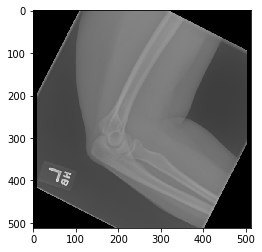

In [0]:
# Display the image
plt.imshow(test_image[3])
plt.plot()
print("Label for the image -",test_label[3])

## Trying out a VGG16 base model with pretrained ImageNet weights
To do:
1. Import the pretrained VGG16 model from Keras.
2. Change/add the last dense layer in VGG16 to finally have one 1 neuron(normal/abnormal) instead of 1000 neurons required in the ImageNet challenge.
3. Freeze the VGG16 layers to prevent large gradient update from ruining the important features.
4. Train the model
5. Get a baseline accuracy.
6. Finetune model
7. Get the finetuned accuracy.

In [0]:
from keras.applications import VGG19
from keras import models
from keras import layers
from keras import optimizers
from keras.layers import Dropout
from keras.models import Model

Using TensorFlow backend.


In [0]:
# Import the pretrained VGG19 model from Keras
from keras.applications import VGG19


conv_base = VGG19(weights='imagenet',include_top=False,input_shape=(SIZE,SIZE,3))

80142336/80134624 [==============================] - 1s 0us/step


In [0]:
# Our base VGG19 model with imagenet weights

conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 512, 512, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 512, 512, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 512, 512, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 256, 256, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 256, 256, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 256, 256, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 128, 128, 128)     0         
__________

In [0]:
# Add 2 dense layers to the VGG19 model so that we get a sigmoid output
from keras import models
from keras import layers
from keras import optimizers
from keras.layers import Dropout
from keras.models import Model

VGG19_model = models.Sequential()

# Freeze the original VGG19 layer weights
conv_base.trainable = True

VGG19_model.add(layers.BatchNormalization(axis=-1,center=True,scale=True,input_shape=(SIZE,SIZE,3)))
VGG19_model.add(conv_base)
VGG19_model.add(layers.pooling.GlobalAveragePooling2D())

#VGG19_model.add(layers.Flatten())
#VGG19_model.add(Dropout(0.8))
VGG19_model.add(layers.BatchNormalization())
#VGG19_model.add(Dropout(0.8))
VGG19_model.add(layers.Dense(256,activation='relu'))
#VGG19_model.add(Dropout(0.8))
VGG19_model.add(layers.Dense(1,activation='sigmoid'))

VGG19_model.compile(loss='binary_crossentropy',optimizer=optimizers.Adam(lr=0.00001),metrics=['acc'])

# The model summary after freezing original VGG19 weights and adding our 2 dense layers
VGG19_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 512, 512, 3)       12        
_________________________________________________________________
vgg19 (Model)                (None, 16, 16, 512)       20024384  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 20,158,029
Trainable params: 20,156,999
Non-trainable params: 1,030
____________________________________________________________

In [0]:
#Adding a pre-processor to make it compatible with imagenet mean.
# Try to create a simple generator using our dataset
from keras import backend as K
from keras.applications.vgg16 import preprocess_input
def trainGenData():
  # Create an iterator to test our pipeline
  iterator = train_dataset.make_one_shot_iterator()
  # Next batch
  next_batch = iterator.get_next()
  while True:
    batch = K.get_session().run(next_batch)
    yield (preprocess_input(batch[0]),batch[1])
    
def validGenData():
  # Create an iterator to test our pipeline
  iterator = valid_dataset.make_one_shot_iterator()
  # Next batch
  next_batch = iterator.get_next()
  while True:
    batch = K.get_session().run(next_batch)
    yield (preprocess_input(batch[0]),batch[1])

trainGen = trainGenData()
validGen = validGenData()

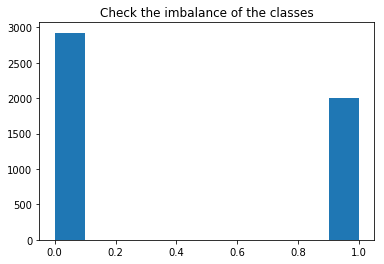

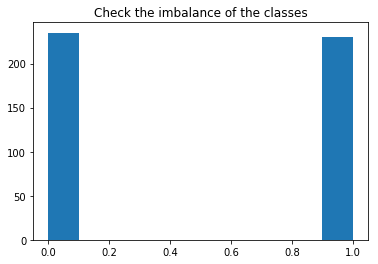

Label 0 count = 2925
Label 1 count = 2006
Class 0 weight = 0.6858119658119658
Class 1 weight = 1.4581256231306081


In [0]:
# Check the balance of our class labels
plt.hist(train_label_list)
plt.title('Check the imbalance of the classes')
plt.plot()
plt.show()

plt.hist(valid_label_list)
plt.title('Check the imbalance of the classes')
plt.plot()
plt.show()

# Get the counts to set the class weights
count_0 = 0
count_1 = 0
for label in train_label_list:
  if label==0:
    count_0+=1
  else:
    count_1+=1

print('Label 0 count =',count_0)
print('Label 1 count =',count_1)

weight_0 = count_1 / count_0
weight_1 = count_0 /count_1

print('Class 0 weight =',weight_0)
print('Class 1 weight =',weight_1)

## Fitting the model works! Now we need to evaluate the model

In [0]:
# Fit the model using proper generators
EPOCHS = 50
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor='val_loss', patience=7),ModelCheckpoint(filepath='VGG19_no_freeze.h5', monitor='val_loss', save_best_only=True)]
history1 = VGG19_model.fit_generator(generator=trainGen,steps_per_epoch=len(train_image_list)/BATCH_SIZE,epochs=EPOCHS,validation_data=validGen,validation_steps=len(valid_image_list)/BATCH_SIZE,class_weight=[weight_0,weight_1],callbacks= callbacks,workers=0)



Epoch 1/50
494/493 [==============================] - 639s 1s/step - loss: 0.4268 - acc: 0.8075 - val_loss: 0.4166 - val_acc: 0.8129
Epoch 2/50
494/493 [==============================] - 640s 1s/step - loss: 0.3922 - acc: 0.8310 - val_loss: 0.4029 - val_acc: 0.8366
Epoch 3/50
494/493 [==============================] - 640s 1s/step - loss: 0.3607 - acc: 0.8453 - val_loss: 0.3888 - val_acc: 0.8194
Epoch 4/50
494/493 [==============================] - 640s 1s/step - loss: 0.3218 - acc: 0.8626 - val_loss: 0.4073 - val_acc: 0.8151
Epoch 5/50
494/493 [==============================] - 633s 1s/step - loss: 0.2924 - acc: 0.8838 - val_loss: 0.3585 - val_acc: 0.8323
Epoch 6/50
494/493 [==============================] - 628s 1s/step - loss: 0.2679 - acc: 0.8921 - val_loss: 0.3909 - val_acc: 0.8430
Epoch 7/50
494/493 [==============================] - 629s 1s/step - loss: 0.2356 - acc: 0.9089 - val_loss: 0.4088 - val_acc: 0.8452
Epoch 8/50
494/493 [==============================] - 629s 1s/step - 

KeyboardInterrupt: ignored

In [0]:
del VGG19_model

In [0]:
from keras.models import load_model
VGG19_model = load_model('VGG19_no_freeze.h5')


Adding 2 dropout layers of rate = 0.35


In [0]:
# Add dropout between the flatten - fc1 and fc1 - fc2 layers
# https://stackoverflow.com/questions/42475381/add-dropout-layers-between-pretrained-dense-layers-in-keras
from keras.layers import Dropout
from keras.models import Model

#VGG16_best.layers[:-2]

# Define the dropout layers
dropout1 = Dropout(0.35)
dropout2 = Dropout(0.35)

# Store the previous layers
till_pooling = VGG19_model.layers[-3]
second_last_dense_layer = VGG19_model.layers[-2]
last_dense_layer = VGG19_model.layers[-1]

# Reconnect the layers
x = dropout1(till_pooling.output)
x = second_last_dense_layer(x)
x = dropout2(x)
predictors = last_dense_layer(x)

# Create a new model
VGG19_dropout = Model(input=VGG19_model.input, output=predictors)

# Compile the model
VGG19_dropout.compile(loss='binary_crossentropy',optimizer=optimizers.Adam(lr=0.000002),metrics=['acc'])

VGG19_dropout.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1_input  (None, 512, 512, 3)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 512, 512, 3)       12        
_________________________________________________________________
vgg19 (Model)                (None, 16, 16, 512)       20024384  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
___________________________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("ba..., outputs=Tensor("de...)`


In [0]:
# Re-fit the model
# Fit the model using a very small learning rate to avoid ruining nice learnt features due to strong gradients
# Setup callbacks to save the best model and early stopping if val loss doesn't decrease after 2 epochs
# https://chrisalbon.com/deep_learning/keras/neural_network_early_stopping/
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor='val_loss', patience=5),ModelCheckpoint(filepath='VGG19_no_freeze_do.h5', monitor='val_loss', save_best_only=True)]

EPOCHS = 25
history_2 = VGG19_dropout.fit_generator(generator=trainGen,steps_per_epoch=len(train_image_list)/BATCH_SIZE,epochs=EPOCHS,validation_data=validGen,validation_steps=len(valid_image_list)/BATCH_SIZE,class_weight=[weight_0,weight_1],callbacks=callbacks,workers=0)

Epoch 1/25
494/493 [==============================] - 621s 1s/step - loss: 0.3054 - acc: 0.8749 - val_loss: 0.3482 - val_acc: 0.8645
Epoch 2/25
494/493 [==============================] - 630s 1s/step - loss: 0.2818 - acc: 0.8883 - val_loss: 0.3847 - val_acc: 0.8495
Epoch 3/25
494/493 [==============================] - 630s 1s/step - loss: 0.2699 - acc: 0.8925 - val_loss: 0.3766 - val_acc: 0.8581
Epoch 4/25
494/493 [==============================] - 629s 1s/step - loss: 0.2571 - acc: 0.8941 - val_loss: 0.3550 - val_acc: 0.8538
Epoch 5/25
494/493 [==============================] - 639s 1s/step - loss: 0.2551 - acc: 0.8949 - val_loss: 0.3548 - val_acc: 0.8710
Epoch 6/25
494/493 [==============================] - 631s 1s/step - loss: 0.2540 - acc: 0.8933 - val_loss: 0.3615 - val_acc: 0.8645


In [0]:
del VGG19_model

In [0]:
VGG19_model = load_model('VGG19_no_freeze_do.h5')

Increasing the drpout to 0.5 due to overfitting

In [0]:
# Add dropout between the flatten - fc1 and fc1 - fc2 layers
# https://stackoverflow.com/questions/42475381/add-dropout-layers-between-pretrained-dense-layers-in-keras
from keras.layers import Dropout
from keras.models import Model

#VGG16_best.layers[:-2]

# Define the dropout layers
dropout1 = Dropout(0.50)
dropout2 = Dropout(0.50)

# Store the previous layers
till_pooling = VGG19_model.layers[-5]
second_last_dense_layer = VGG19_model.layers[-3]
last_dense_layer = VGG19_model.layers[-1]

# Reconnect the layers
x = dropout1(till_pooling.output)
x = second_last_dense_layer(x)
x = dropout2(x)
predictors = last_dense_layer(x)

# Create a new model
VGG19_dropout_inc = Model(input=VGG19_model.input, output=predictors)

# Compile the model
VGG19_dropout_inc.compile(loss='binary_crossentropy',optimizer=optimizers.Adam(lr=0.000002),metrics=['acc'])

VGG19_dropout_inc.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1_input  (None, 512, 512, 3)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 512, 512, 3)       12        
_________________________________________________________________
vgg19 (Model)                (None, 16, 16, 512)       20024384  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("ba..., outputs=Tensor("de...)`


In [0]:
callbacks = [EarlyStopping(monitor='val_loss', patience=5),ModelCheckpoint(filepath='VGG19_no_freeze_do_incloss.h5', monitor='val_loss', save_best_only=True),ModelCheckpoint(filepath='VGG19_no_freeze_do_incacc.h5', monitor='val_acc', save_best_only=True)]

EPOCHS = 25
history_2 = VGG19_dropout_inc.fit_generator(generator=trainGen,steps_per_epoch=len(train_image_list)/BATCH_SIZE,epochs=EPOCHS,validation_data=validGen,validation_steps=len(valid_image_list)/BATCH_SIZE,class_weight=[weight_0,weight_1],callbacks=callbacks,workers=0)

Epoch 1/25
494/493 [==============================] - 624s 1s/step - loss: 0.3374 - acc: 0.8583 - val_loss: 0.3580 - val_acc: 0.8602
Epoch 2/25
494/493 [==============================] - 630s 1s/step - loss: 0.3344 - acc: 0.8565 - val_loss: 0.3670 - val_acc: 0.8624
Epoch 3/25
494/493 [==============================] - 631s 1s/step - loss: 0.3172 - acc: 0.8630 - val_loss: 0.3643 - val_acc: 0.8624
Epoch 4/25
494/493 [==============================] - 631s 1s/step - loss: 0.3069 - acc: 0.8711 - val_loss: 0.3630 - val_acc: 0.8581
Epoch 5/25
494/493 [==============================] - 631s 1s/step - loss: 0.3160 - acc: 0.8719 - val_loss: 0.3754 - val_acc: 0.8602
Epoch 6/25
494/493 [==============================] - 630s 1s/step - loss: 0.2935 - acc: 0.8806 - val_loss: 0.3706 - val_acc: 0.8645


In [0]:
del VGG19_dropout_inc
del VGG19_model

In [0]:
VGG19_model = load_model('VGG19_no_freeze.h5')

Trying a dropout of 0.5 on the original model instead and decreasing the learning rate by factor of 10.

In [0]:
# Add dropout between the flatten - fc1 and fc1 - fc2 layers
# https://stackoverflow.com/questions/42475381/add-dropout-layers-between-pretrained-dense-layers-in-keras
from keras.layers import Dropout
from keras.models import Model

#VGG16_best.layers[:-2]

# Define the dropout layers
dropout1 = Dropout(0.50)
dropout2 = Dropout(0.50)

# Store the previous layers
till_pooling = VGG19_model.layers[-3]
second_last_dense_layer = VGG19_model.layers[-2]
last_dense_layer = VGG19_model.layers[-1]

# Reconnect the layers
x = dropout1(till_pooling.output)
x = second_last_dense_layer(x)
x = dropout2(x)
predictors = last_dense_layer(x)

# Create a new model
VGG19_dropout2 = Model(input=VGG19_model.input, output=predictors)

# Compile the model
VGG19_dropout2.compile(loss='binary_crossentropy',optimizer=optimizers.Adam(lr=0.000002),metrics=['acc'])

VGG19_dropout2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1_input  (None, 512, 512, 3)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 512, 512, 3)       12        
_________________________________________________________________
vgg19 (Model)                (None, 16, 16, 512)       20024384  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("ba..., outputs=Tensor("de...)`


In [0]:
callbacks = [EarlyStopping(monitor='val_loss', patience=5),ModelCheckpoint(filepath='VGG19_no_freeze_do2_loss.h5', monitor='val_loss', save_best_only=True),ModelCheckpoint(filepath='VGG19_no_freeze_do2_acc.h5', monitor='val_acc', save_best_only=True)]

EPOCHS = 25
history_3 = VGG19_dropout2.fit_generator(generator=trainGen,steps_per_epoch=len(train_image_list)/BATCH_SIZE,epochs=EPOCHS,validation_data=validGen,validation_steps=len(valid_image_list)/BATCH_SIZE,class_weight=[weight_0,weight_1],callbacks=callbacks,workers=0)

Epoch 1/25
494/493 [==============================] - 625s 1s/step - loss: 0.3773 - acc: 0.8411 - val_loss: 0.3667 - val_acc: 0.8538
Epoch 2/25
494/493 [==============================] - 631s 1s/step - loss: 0.3459 - acc: 0.8567 - val_loss: 0.4160 - val_acc: 0.8344
Epoch 3/25
494/493 [==============================] - 635s 1s/step - loss: 0.3237 - acc: 0.8642 - val_loss: 0.3535 - val_acc: 0.8624
Epoch 4/25
494/493 [==============================] - 643s 1s/step - loss: 0.3203 - acc: 0.8636 - val_loss: 0.3789 - val_acc: 0.8710
Epoch 5/25
494/493 [==============================] - 642s 1s/step - loss: 0.2993 - acc: 0.8737 - val_loss: 0.3736 - val_acc: 0.8581
Epoch 6/25
494/493 [==============================] - 644s 1s/step - loss: 0.3037 - acc: 0.8739 - val_loss: 0.4319 - val_acc: 0.8344
Epoch 7/25
494/493 [==============================] - 643s 1s/step - loss: 0.3100 - acc: 0.8648 - val_loss: 0.3757 - val_acc: 0.8559
Epoch 8/25
494/493 [==============================] - 643s 1s/step - 

In [0]:
callbacks = [ModelCheckpoint(filepath='VGG19_no_freeze_do2_loss1.h5', monitor='val_loss', save_best_only=True),ModelCheckpoint(filepath='VGG19_no_freeze_do2_acc1.h5', monitor='val_acc', save_best_only=True)]

EPOCHS = 25
history_4 = VGG19_dropout2.fit_generator(generator=trainGen,steps_per_epoch=len(train_image_list)/BATCH_SIZE,epochs=EPOCHS,validation_data=validGen,validation_steps=len(valid_image_list)/BATCH_SIZE,class_weight=[weight_0,weight_1],callbacks=callbacks,workers=0)

Epoch 1/25
494/493 [==============================] - 644s 1s/step - loss: 0.2938 - acc: 0.8808 - val_loss: 0.3828 - val_acc: 0.8538
Epoch 2/25
494/493 [==============================] - 643s 1s/step - loss: 0.2680 - acc: 0.8945 - val_loss: 0.3912 - val_acc: 0.8624
Epoch 3/25
494/493 [==============================] - 644s 1s/step - loss: 0.2635 - acc: 0.8895 - val_loss: 0.3681 - val_acc: 0.8710
Epoch 4/25
494/493 [==============================] - 644s 1s/step - loss: 0.2613 - acc: 0.8927 - val_loss: 0.3681 - val_acc: 0.8602
Epoch 5/25
494/493 [==============================] - 643s 1s/step - loss: 0.2554 - acc: 0.8947 - val_loss: 0.3999 - val_acc: 0.8559
Epoch 6/25
494/493 [==============================] - 642s 1s/step - loss: 0.2521 - acc: 0.8957 - val_loss: 0.3753 - val_acc: 0.8667
Epoch 7/25
494/493 [==============================] - 643s 1s/step - loss: 0.2591 - acc: 0.8957 - val_loss: 0.3881 - val_acc: 0.8688
Epoch 8/25
494/493 [==============================] - 642s 1s/step - 

In [0]:
from keras.models import load_model
VGG19_model = load_model('VGG19_no_freeze_do2_acc1.h5')

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [0]:
# Try to evaluate our model at this stage before making changes and then re-fitting our model
evaluation = VGG19_model.evaluate_generator(generator=validGen,steps=len(valid_image_list)/BATCH_SIZE,workers=0)
print('Evaluation loss =',evaluation[0])
print('Evaluation accuracy =',evaluation[1]*100)

Evaluation loss = 0.3715739365947503
Evaluation accuracy = 87.7419348045062


In [0]:
# Get predictions from our model
predictions = VGG19_model.predict_generator(validGen,steps=len(valid_image_list)/BATCH_SIZE,workers=0)

In [0]:
# Get binary predictions using a threshold
threshold = 0.5
for pred in predictions.T.tolist():
  predictions = pred
  
predictions_binary = []

for prediction in predictions:
  if prediction < threshold:
    predictions_binary.append(0)
  else:
    predictions_binary.append(1)

#predictions_binary

In [0]:
# Get the classification report
from sklearn.metrics import classification_report

report = classification_report(predictions_binary,valid_label_list)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.84      0.89       264
           1       0.81      0.93      0.87       201

   micro avg       0.88      0.88      0.88       465
   macro avg       0.88      0.88      0.88       465
weighted avg       0.89      0.88      0.88       465



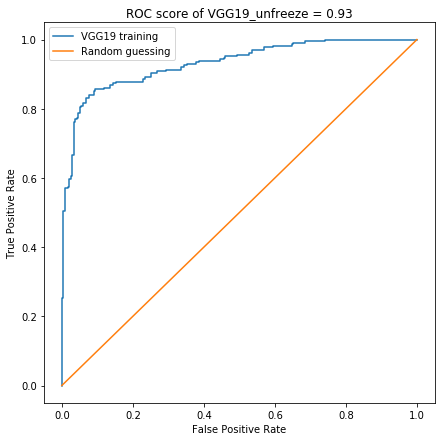

In [0]:
# Plot ROC curve
plt.rcParams["figure.figsize"] = (7,7)
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(valid_label_list,predictions)
auc_score = roc_auc_score(valid_label_list,predictions)

plt.plot(fpr,tpr,label='VGG19 training')
plt.plot(fpr,fpr,label='Random guessing')
plt.title('ROC score of VGG19_unfreeze = %2.2f'%auc_score)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

plt.show()

In [0]:
# Studywise predictions
studywise_predictions = []
studywise_predictions_binary = []

test_counter = 0

for indx,study_row in valid_labelled_studies.iterrows():
  print('Study:\n',study_row['study_name'])
  
  # List of images for the study
  study_image_list = study_row['images']
  
  # List to store the predictions for each image
  study_predictions = []
  
  # Number of study images
  num_study_imgs = len(study_image_list)
  
  for study_image in study_image_list:
    # Read the image from disk
    image_string = tf.read_file(study_image)
    # Decode the image
    image = tf.image.decode_png(image_string,channels=CHANNELS)
    # Resize into 512x512 images
    image = tf.image.resize_image_with_crop_or_pad(image,SIZE,SIZE)
    # Plot the image
    image = sess.run(image)
    # plt.imshow(image)
    # plt.title(study_image[-10:])
    # plt.show()
    # Make the predictions
    image = np.reshape(image,newshape=[1,512,512,3])
    pred = VGG19_model.predict(image)
    study_predictions.append(pred)
    
  # Take the average of all predictions as the study prediction
  avg_prediction = sum(study_predictions)/num_study_imgs
  
  # Sigmoid values
  studywise_predictions.append(avg_prediction)
    
  # Class predictions 0/1
  if avg_prediction < 0.5:
    studywise_predictions_binary.append(0)
  else:
    studywise_predictions_binary.append(1)
  
#   test_counter+=1
  
#   if test_counter==5:
#     break

Study:
 MURA-v1.1/valid/XR_ELBOW/patient11659/study1_positive/
Study:
 MURA-v1.1/valid/XR_ELBOW/patient11802/study1_positive/
Study:
 MURA-v1.1/valid/XR_ELBOW/patient11803/study1_positive/
Study:
 MURA-v1.1/valid/XR_ELBOW/patient11804/study1_positive/
Study:
 MURA-v1.1/valid/XR_ELBOW/patient11805/study1_positive/
Study:
 MURA-v1.1/valid/XR_ELBOW/patient11414/study1_positive/
Study:
 MURA-v1.1/valid/XR_ELBOW/patient11186/study1_positive/
Study:
 MURA-v1.1/valid/XR_ELBOW/patient11806/study1_positive/
Study:
 MURA-v1.1/valid/XR_ELBOW/patient11807/study1_positive/
Study:
 MURA-v1.1/valid/XR_ELBOW/patient11793/study1_positive/
Study:
 MURA-v1.1/valid/XR_ELBOW/patient11358/study1_positive/
Study:
 MURA-v1.1/valid/XR_ELBOW/patient11417/study1_positive/
Study:
 MURA-v1.1/valid/XR_ELBOW/patient11417/study2_positive/
Study:
 MURA-v1.1/valid/XR_ELBOW/patient11586/study1_positive/
Study:
 MURA-v1.1/valid/XR_ELBOW/patient11389/study1_positive/
Study:
 MURA-v1.1/valid/XR_ELBOW/patient11808/study1_po

In [0]:
# Get the study classification report
from sklearn.metrics import classification_report
print(classification_report(studywise_predictions_binary,valid_labelled_studies['label'].tolist()),)

              precision    recall  f1-score   support

           0       0.95      0.81      0.87       107
           1       0.70      0.90      0.79        51

   micro avg       0.84      0.84      0.84       158
   macro avg       0.82      0.86      0.83       158
weighted avg       0.87      0.84      0.85       158



In [0]:
# Getting the sigmoid values in proper format
stdy_predictions = []

for i in range(len(studywise_predictions)):
  stdy_predictions.append(studywise_predictions[i][0][0])

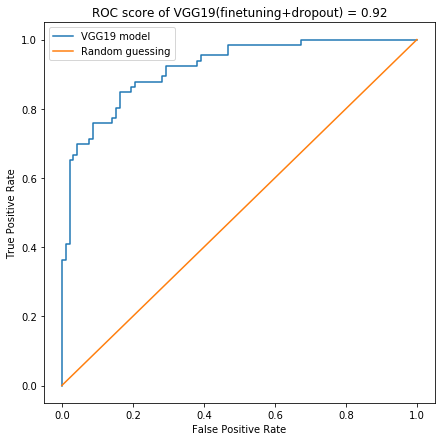

In [0]:
# Plot ROC curve
plt.rcParams["figure.figsize"] = (7,7)
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(valid_labelled_studies['label'].tolist(),stdy_predictions)
auc_score = roc_auc_score(valid_labelled_studies['label'].tolist(),stdy_predictions)

plt.plot(fpr,tpr,label='VGG19 model')
plt.plot(fpr,fpr,label='Random guessing')
plt.title('ROC score of VGG19(finetuning+dropout) = %2.2f'%auc_score)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

plt.show()

In [0]:
# Try to calculate Cohen's Kappa score
# In practice we need to compute this score on studies instead of individual images
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(studywise_predictions_binary,valid_labelled_studies['label'].tolist())

0.6639441892121831

In [0]:
from keras.models import load_model
VGG19_model = load_model('VGG19_no_freeze_do.h5')

In [0]:
# Try to evaluate our model at this stage before making changes and then re-fitting our model
evaluation = VGG19_model.evaluate_generator(generator=validGen,steps=len(valid_image_list)/BATCH_SIZE,workers=0)
print('Evaluation loss =',evaluation[0])
print('Evaluation accuracy =',evaluation[1]*100)

Evaluation loss = 0.348209631619274
Evaluation accuracy = 86.45161255713431


In [0]:
# Get predictions from our model
predictions = VGG19_model.predict_generator(validGen,steps=len(valid_image_list)/BATCH_SIZE,workers=0)

In [0]:
# Get binary predictions using a threshold
threshold = 0.5
for pred in predictions.T.tolist():
  predictions = pred
  
predictions_binary = []

for prediction in predictions:
  if prediction < threshold:
    predictions_binary.append(0)
  else:
    predictions_binary.append(1)

#predictions_binary

In [0]:
# Get the classification report
from sklearn.metrics import classification_report

report = classification_report(predictions_binary,valid_label_list)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.81      0.88       276
           1       0.77      0.94      0.85       189

   micro avg       0.86      0.86      0.86       465
   macro avg       0.86      0.88      0.86       465
weighted avg       0.88      0.86      0.87       465



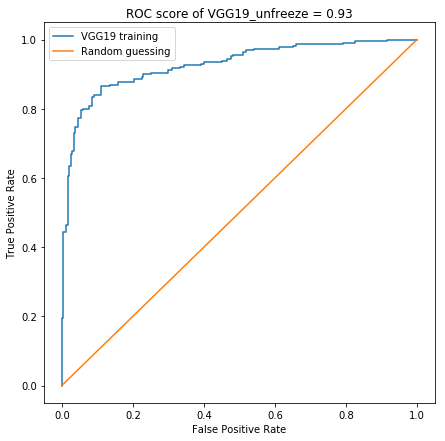

In [0]:
# Plot ROC curve
plt.rcParams["figure.figsize"] = (7,7)
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(valid_label_list,predictions)
auc_score = roc_auc_score(valid_label_list,predictions)

plt.plot(fpr,tpr,label='VGG19 training')
plt.plot(fpr,fpr,label='Random guessing')
plt.title('ROC score of VGG19_unfreeze = %2.2f'%auc_score)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

plt.show()

In [0]:
# Studywise predictions
studywise_predictions = []
studywise_predictions_binary = []

test_counter = 0

for indx,study_row in valid_labelled_studies.iterrows():
  print('Study:\n',study_row['study_name'])
  
  # List of images for the study
  study_image_list = study_row['images']
  
  # List to store the predictions for each image
  study_predictions = []
  
  # Number of study images
  num_study_imgs = len(study_image_list)
  
  for study_image in study_image_list:
    # Read the image from disk
    image_string = tf.read_file(study_image)
    # Decode the image
    image = tf.image.decode_png(image_string,channels=CHANNELS)
    # Resize into 512x512 images
    image = tf.image.resize_image_with_crop_or_pad(image,SIZE,SIZE)
    # Plot the image
    image = sess.run(image)
    # plt.imshow(image)
    # plt.title(study_image[-10:])
    # plt.show()
    # Make the predictions
    image = np.reshape(image,newshape=[1,512,512,3])
    pred = VGG19_model.predict(image)
    study_predictions.append(pred)
    
  # Take the average of all predictions as the study prediction
  avg_prediction = sum(study_predictions)/num_study_imgs
  
  # Sigmoid values
  studywise_predictions.append(avg_prediction)
    
  # Class predictions 0/1
  if avg_prediction < 0.5:
    studywise_predictions_binary.append(0)
  else:
    studywise_predictions_binary.append(1)
  
#   test_counter+=1
  
#   if test_counter==5:
#     break

Study:
 MURA-v1.1/valid/XR_ELBOW/patient11659/study1_positive/
Study:
 MURA-v1.1/valid/XR_ELBOW/patient11802/study1_positive/
Study:
 MURA-v1.1/valid/XR_ELBOW/patient11803/study1_positive/
Study:
 MURA-v1.1/valid/XR_ELBOW/patient11804/study1_positive/
Study:
 MURA-v1.1/valid/XR_ELBOW/patient11805/study1_positive/
Study:
 MURA-v1.1/valid/XR_ELBOW/patient11414/study1_positive/
Study:
 MURA-v1.1/valid/XR_ELBOW/patient11186/study1_positive/
Study:
 MURA-v1.1/valid/XR_ELBOW/patient11806/study1_positive/
Study:
 MURA-v1.1/valid/XR_ELBOW/patient11807/study1_positive/
Study:
 MURA-v1.1/valid/XR_ELBOW/patient11793/study1_positive/
Study:
 MURA-v1.1/valid/XR_ELBOW/patient11358/study1_positive/
Study:
 MURA-v1.1/valid/XR_ELBOW/patient11417/study1_positive/
Study:
 MURA-v1.1/valid/XR_ELBOW/patient11417/study2_positive/
Study:
 MURA-v1.1/valid/XR_ELBOW/patient11586/study1_positive/
Study:
 MURA-v1.1/valid/XR_ELBOW/patient11389/study1_positive/
Study:
 MURA-v1.1/valid/XR_ELBOW/patient11808/study1_po

In [0]:
# Get the study classification report
from sklearn.metrics import classification_report
print(classification_report(studywise_predictions_binary,valid_labelled_studies['label'].tolist()),)

              precision    recall  f1-score   support

           0       0.93      0.80      0.86       107
           1       0.68      0.88      0.77        51

   micro avg       0.83      0.83      0.83       158
   macro avg       0.81      0.84      0.82       158
weighted avg       0.85      0.83      0.83       158



In [0]:
# Getting the sigmoid values in proper format
stdy_predictions = []

for i in range(len(studywise_predictions)):
  stdy_predictions.append(studywise_predictions[i][0][0])

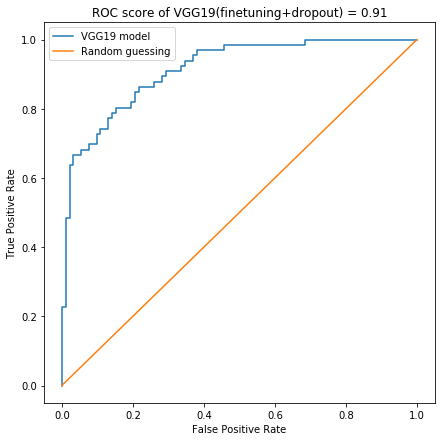

In [0]:
# Plot ROC curve
plt.rcParams["figure.figsize"] = (7,7)
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(valid_labelled_studies['label'].tolist(),stdy_predictions)
auc_score = roc_auc_score(valid_labelled_studies['label'].tolist(),stdy_predictions)

plt.plot(fpr,tpr,label='VGG19 model')
plt.plot(fpr,fpr,label='Random guessing')
plt.title('ROC score of VGG19(finetuning+dropout) = %2.2f'%auc_score)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

plt.show()

In [0]:
# Try to calculate Cohen's Kappa score
# In practice we need to compute this score on studies instead of individual images
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(studywise_predictions_binary,valid_labelled_studies['label'].tolist())

0.6370597243491577

In [0]:
#Trial for loading model
from keras.models import load_model

Trial_model = load_model('VGG19_best1_model.h5')

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:327: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [0]:
del Trial_model

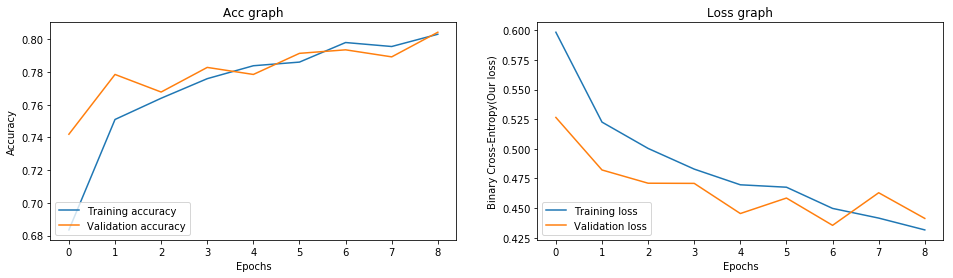

In [0]:
# Training plots
plt.rcParams["figure.figsize"] = (16,4)

train_acc = history_0.history['acc']
valid_acc = history_0.history['val_acc']
train_loss = history_0.history['loss']
valid_loss = history_0.history['val_loss']

plt.subplot(1,2,1)
plt.plot(train_acc,label='Training accuracy')
plt.plot(valid_acc,label='Validation accuracy')
plt.title('Acc graph')
plt.legend(loc='lower left')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')

plt.subplot(1,2,2)
plt.plot(train_loss,label='Training loss')
plt.plot(valid_loss,label='Validation loss')
plt.title('Loss graph')
plt.legend(loc='lower left')
plt.ylabel('Binary Cross-Entropy(Our loss)')
plt.xlabel('Epochs')

plt.show()

In [0]:
del VGG19_model

In [0]:
VGG19_model = load_model('VGG19_best1_model.h5')

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:327: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [0]:
# Try to evaluate our model at this stage before making changes and then re-fitting our model
evaluation = VGG19_model.evaluate_generator(generator=validGen,steps=len(valid_image_list)/BATCH_SIZE,workers=0)
print('Evaluation loss =',evaluation[0])
print('Evaluation accuracy =',evaluation[1]*100)

Evaluation loss = 0.4289891820761465
Evaluation accuracy = 80.6451609698675


In [0]:
# Get predictions from our model
predictions = VGG19_model.predict_generator(validGen,steps=len(valid_image_list)/BATCH_SIZE,workers=0)

In [0]:
# Get binary predictions using a threshold
threshold = 0.5
for pred in predictions.T.tolist():
  predictions = pred
  
predictions_binary = []

for prediction in predictions:
  if prediction < threshold:
    predictions_binary.append(0)
  else:
    predictions_binary.append(1)

#predictions_binary

In [0]:
# Get the classification report
from sklearn.metrics import classification_report

report = classification_report(predictions_binary,valid_label_list)
print(report)

              precision    recall  f1-score   support

           0       0.63      0.50      0.56       300
           1       0.34      0.48      0.40       165

   micro avg       0.49      0.49      0.49       465
   macro avg       0.49      0.49      0.48       465
weighted avg       0.53      0.49      0.50       465



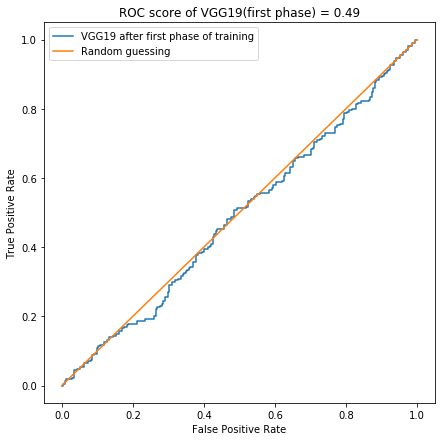

In [0]:
# Plot ROC curve
plt.rcParams["figure.figsize"] = (7,7)
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(valid_label_list,predictions)
auc_score = roc_auc_score(valid_label_list,predictions)

plt.plot(fpr,tpr,label='VGG19 after first phase of training')
plt.plot(fpr,fpr,label='Random guessing')
plt.title('ROC score of VGG19(first phase) = %2.2f'%auc_score)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

plt.show()

Unfreezing the Last Block of VGG19, decreasing the learning rate to 0.00001 

In [0]:
del VGG19_model

In [0]:
from keras.models import load_model

VGG19_model = load_model('VGG19_best1_model.h5')

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:327: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [0]:
VGG19_model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_3 (Batch (None, 448, 448, 3)       12        
_________________________________________________________________
vgg19 (Model)                (None, 14, 14, 512)       20024384  
_________________________________________________________________
global_average_pooling2d_2 ( (None, 512)               0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 20,158,029
Trainable params: 20,156,999
Non-trainable params: 1,030
____________________________________________________________

In [0]:
# Check the trainable status of the individual layers
for layer in VGG19_model.layers:
    print(layer, layer.trainable)
    


<keras.layers.normalization.BatchNormalization object at 0x7f89664770f0> True
<keras.engine.training.Model object at 0x7f8966477358> True
<keras.layers.pooling.GlobalAveragePooling2D object at 0x7f8966364160> True
<keras.layers.normalization.BatchNormalization object at 0x7f8966364208> True
<keras.layers.core.Dense object at 0x7f8966364198> True
<keras.layers.core.Dense object at 0x7f89660d5128> True


In [0]:
for layer in VGG19_model.layers[:-2]:
    layer.trainable = False
    
for layer in VGG19_model.layers:
    print(layer, layer.trainable)

<keras.layers.normalization.BatchNormalization object at 0x7f89664770f0> False
<keras.engine.training.Model object at 0x7f8966477358> False
<keras.layers.pooling.GlobalAveragePooling2D object at 0x7f8966364160> False
<keras.layers.normalization.BatchNormalization object at 0x7f8966364208> False
<keras.layers.core.Dense object at 0x7f8966364198> True
<keras.layers.core.Dense object at 0x7f89660d5128> True


In [0]:
VGG19_model.compile(loss='binary_crossentropy',optimizer=optimizers.Adam(lr=0.00001),metrics=['acc'])

In [0]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor='val_loss', patience=2),ModelCheckpoint(filepath='VGG19_best1_0_model.h5', monitor='val_acc', save_best_only=True)]

EPOCHS = 25
history_1 = VGG19_model.fit_generator(generator=trainGen,steps_per_epoch=len(train_image_list)/BATCH_SIZE,epochs=EPOCHS,validation_data=validGen,validation_steps=len(valid_image_list)/BATCH_SIZE,class_weight=[weight_0,weight_1],callbacks=callbacks,workers=0)

Epoch 1/25
494/493 [==============================] - 313s 634ms/step - loss: 0.4237 - acc: 0.8105 - val_loss: 0.4351 - val_acc: 0.7871
Epoch 2/25
494/493 [==============================] - 314s 636ms/step - loss: 0.4193 - acc: 0.8211 - val_loss: 0.4459 - val_acc: 0.8000
Epoch 3/25
494/493 [==============================] - 314s 636ms/step - loss: 0.4218 - acc: 0.8091 - val_loss: 0.4388 - val_acc: 0.7914


In [0]:
#training for extra ten epochs with no early stop
EPOCHS = 10
history_1 = VGG19_model.fit_generator(generator=trainGen,steps_per_epoch=len(train_image_list)/BATCH_SIZE,epochs=EPOCHS,validation_data=validGen,validation_steps=len(valid_image_list)/BATCH_SIZE,class_weight=[weight_0,weight_1],workers=0)

Epoch 1/10
494/493 [==============================] - 314s 635ms/step - loss: 0.4179 - acc: 0.8117 - val_loss: 0.4233 - val_acc: 0.8172
Epoch 2/10
494/493 [==============================] - 314s 635ms/step - loss: 0.4218 - acc: 0.8121 - val_loss: 0.4470 - val_acc: 0.7957
Epoch 3/10
494/493 [==============================] - 314s 636ms/step - loss: 0.4153 - acc: 0.8152 - val_loss: 0.4208 - val_acc: 0.8129
Epoch 4/10
494/493 [==============================] - 314s 635ms/step - loss: 0.4139 - acc: 0.8202 - val_loss: 0.4421 - val_acc: 0.7871
Epoch 5/10
494/493 [==============================] - 314s 635ms/step - loss: 0.4113 - acc: 0.8194 - val_loss: 0.4361 - val_acc: 0.8129
Epoch 6/10
494/493 [==============================] - 314s 636ms/step - loss: 0.4129 - acc: 0.8204 - val_loss: 0.4382 - val_acc: 0.8022
Epoch 7/10
494/493 [==============================] - 314s 636ms/step - loss: 0.4099 - acc: 0.8227 - val_loss: 0.4433 - val_acc: 0.7935
Epoch 8/10
494/493 [============================

In [0]:
VGG19_model = load_model('VGG19_best1_0_model.h5')

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:327: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


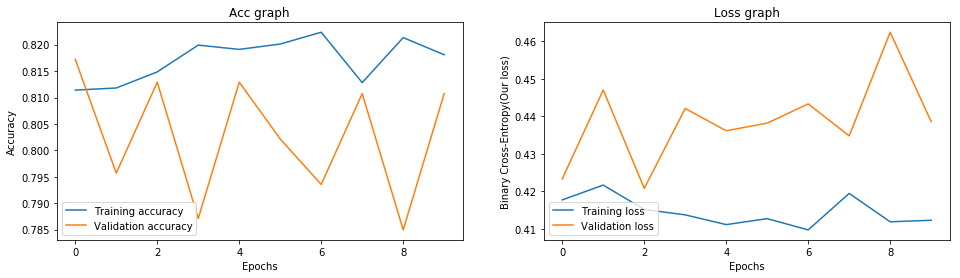

In [0]:
# Training plots
plt.rcParams["figure.figsize"] = (16,4)

train_acc = history_1.history['acc']
valid_acc = history_1.history['val_acc']
train_loss = history_1.history['loss']
valid_loss = history_1.history['val_loss']

plt.subplot(1,2,1)
plt.plot(train_acc,label='Training accuracy')
plt.plot(valid_acc,label='Validation accuracy')
plt.title('Acc graph')
plt.legend(loc='lower left')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')

plt.subplot(1,2,2)
plt.plot(train_loss,label='Training loss')
plt.plot(valid_loss,label='Validation loss')
plt.title('Loss graph')
plt.legend(loc='lower left')
plt.ylabel('Binary Cross-Entropy(Our loss)')
plt.xlabel('Epochs')

plt.show()

In [0]:
# Try to evaluate our model at this stage before making changes and then re-fitting our model
evaluation = VGG19_model.evaluate_generator(generator=validGen,steps=len(valid_image_list)/BATCH_SIZE,workers=0)
print('Evaluation loss =',evaluation[0])
print('Evaluation accuracy =',evaluation[1]*100)

Evaluation loss = 0.44563709119314787
Evaluation accuracy = 79.35483878658664


In [0]:
# Get predictions from our model
predictions = VGG19_model.predict_generator(validGen,steps=len(valid_image_list)/BATCH_SIZE,workers=0)

In [0]:
# Get binary predictions using a threshold
threshold = 0.5
for pred in predictions.T.tolist():
  predictions = pred
  
predictions_binary = []

for prediction in predictions:
  if prediction < threshold:
    predictions_binary.append(0)
  else:
    predictions_binary.append(1)

#predictions_binary

In [0]:
# Get the classification report
from sklearn.metrics import classification_report

report = classification_report(predictions_binary,valid_label_list)
print(report)

              precision    recall  f1-score   support

           0       0.61      0.50      0.55       289
           1       0.37      0.48      0.42       176

   micro avg       0.49      0.49      0.49       465
   macro avg       0.49      0.49      0.48       465
weighted avg       0.52      0.49      0.50       465



In [0]:
VGG19_model.save('VGG19_best1_0_e_model.h5')

In [0]:
del VGG19_model

In [0]:
#Extra epochs even with a lower learning rate don't seem to help the validation accuracy
#UnFreeze Hidden layers
from keras.models import load_model

VGG19_model = load_model('VGG19_best1_model.h5')

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:327: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [0]:
conv_base_2 = VGG19_model.layers[-5]
conv_base_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 448, 448, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 448, 448, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 448, 448, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 224, 224, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 224, 224, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 224, 224, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 112, 112, 128)     0         
__________

In [0]:
# Unfreezing the last block and train with a smaller learning rate
# Freeze the layers except the last 5 layers
for layer in conv_base_2.layers[:-5]:
    layer.trainable = False
 
# Check the trainable status of the individual layers
for layer in conv_base_2.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f89648bd898> False
<keras.layers.convolutional.Conv2D object at 0x7f89648bab00> False
<keras.layers.convolutional.Conv2D object at 0x7f896487a4e0> False
<keras.layers.pooling.MaxPooling2D object at 0x7f8964797400> False
<keras.layers.convolutional.Conv2D object at 0x7f8964797390> False
<keras.layers.convolutional.Conv2D object at 0x7f8964797240> False
<keras.layers.pooling.MaxPooling2D object at 0x7f8964797a90> False
<keras.layers.convolutional.Conv2D object at 0x7f8964797b70> False
<keras.layers.convolutional.Conv2D object at 0x7f8964797cf8> False
<keras.layers.convolutional.Conv2D object at 0x7f8964797e80> False
<keras.layers.convolutional.Conv2D object at 0x7f89647ac048> False
<keras.layers.pooling.MaxPooling2D object at 0x7f89647ac1d0> False
<keras.layers.convolutional.Conv2D object at 0x7f89647ac278> False
<keras.layers.convolutional.Conv2D object at 0x7f89647ac400> False
<keras.layers.convolutional.Conv2D object at 0x7f89647ac588>

In [0]:
#increasing the patience of early stopping to give backpropogation a chance
from keras.callbacks import EarlyStopping, ModelCheckpoint
VGG19_model.compile(loss='binary_crossentropy',optimizer=optimizers.Adam(lr=0.00002),metrics=['acc'])

# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor='val_loss', patience=5),ModelCheckpoint(filepath='VGG19_best1_1_model.h5', monitor='val_acc', save_best_only=True)]

EPOCHS = 25
history_2 = VGG19_model.fit_generator(generator=trainGen,steps_per_epoch=len(train_image_list)/BATCH_SIZE,epochs=EPOCHS,validation_data=validGen,validation_steps=len(valid_image_list)/BATCH_SIZE,class_weight=[weight_0,weight_1],callbacks=callbacks,workers=0)

Epoch 1/25
494/493 [==============================] - 386s 781ms/step - loss: 0.4655 - acc: 0.7899 - val_loss: 0.4676 - val_acc: 0.7828
Epoch 2/25
494/493 [==============================] - 384s 777ms/step - loss: 0.3896 - acc: 0.8296 - val_loss: 0.4374 - val_acc: 0.7742
Epoch 3/25
494/493 [==============================] - 385s 780ms/step - loss: 0.3416 - acc: 0.8530 - val_loss: 0.3481 - val_acc: 0.8387
Epoch 4/25
494/493 [==============================] - 382s 774ms/step - loss: 0.2972 - acc: 0.8755 - val_loss: 0.4447 - val_acc: 0.7957
Epoch 5/25
494/493 [==============================] - 379s 767ms/step - loss: 0.2583 - acc: 0.8933 - val_loss: 0.4017 - val_acc: 0.7978
Epoch 6/25
494/493 [==============================] - 381s 771ms/step - loss: 0.2306 - acc: 0.9103 - val_loss: 0.3967 - val_acc: 0.7978
Epoch 7/25
494/493 [==============================] - 383s 775ms/step - loss: 0.1930 - acc: 0.9285 - val_loss: 0.3816 - val_acc: 0.8366
Epoch 8/25
494/493 [============================

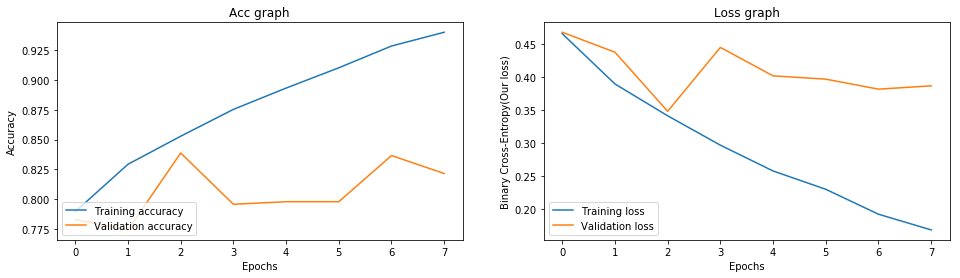

In [0]:
# Training plots
plt.rcParams["figure.figsize"] = (16,4)

train_acc = history_2.history['acc']
valid_acc = history_2.history['val_acc']
train_loss = history_2.history['loss']
valid_loss = history_2.history['val_loss']

plt.subplot(1,2,1)
plt.plot(train_acc,label='Training accuracy')
plt.plot(valid_acc,label='Validation accuracy')
plt.title('Acc graph')
plt.legend(loc='lower left')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')

plt.subplot(1,2,2)
plt.plot(train_loss,label='Training loss')
plt.plot(valid_loss,label='Validation loss')
plt.title('Loss graph')
plt.legend(loc='lower left')
plt.ylabel('Binary Cross-Entropy(Our loss)')
plt.xlabel('Epochs')

plt.show()

In [0]:
VGG19_model = load_model('VGG19_best1_1_model.h5')

In [0]:
# Try to evaluate our model at this stage before making changes and then re-fitting our model
evaluation = VGG19_model.evaluate_generator(generator=validGen,steps=len(valid_image_list)/BATCH_SIZE,workers=0)
print('Evaluation loss =',evaluation[0])
print('Evaluation accuracy =',evaluation[1]*100)

Evaluation loss = 0.3446378272066834
Evaluation accuracy = 83.44085966387102


In [0]:
# Get predictions from our model
predictions = VGG19_model.predict_generator(validGen,steps=len(valid_image_list)/BATCH_SIZE,workers=0)

In [0]:
# Get binary predictions using a threshold
threshold = 0.5
for pred in predictions.T.tolist():
  predictions = pred
  
predictions_binary = []

for prediction in predictions:
  if prediction < threshold:
    predictions_binary.append(0)
  else:
    predictions_binary.append(1)

#predictions_binary

In [0]:
# Get the classification report
from sklearn.metrics import classification_report

report = classification_report(predictions_binary,valid_label_list)
print(report)

              precision    recall  f1-score   support

           0       0.49      0.49      0.49       236
           1       0.47      0.48      0.47       229

   micro avg       0.48      0.48      0.48       465
   macro avg       0.48      0.48      0.48       465
weighted avg       0.48      0.48      0.48       465



We can clearly observe overfitting in this model.
Time to introduce some dropout.



In [0]:
del VGG19_model


In [0]:
VGG19_model = load_model('VGG19_best1_1_model.h5')
VGG19_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_3 (Batch (None, 448, 448, 3)       12        
_________________________________________________________________
vgg19 (Model)                (None, 14, 14, 512)       20024384  
_________________________________________________________________
global_average_pooling2d_2 ( (None, 512)               0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 20,158,029
Trainable params: 9,571,847
Non-trainable params: 10,586,182
________________________________________________________

In [0]:
conv_base_3 = VGG19_model.layers[-5]
conv_base_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 448, 448, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 448, 448, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 448, 448, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 224, 224, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 224, 224, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 224, 224, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 112, 112, 128)     0         
__________

In [0]:
#Check the trainable status of the individual layers
for layer in conv_base_3.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f895d0d95f8> False
<keras.layers.convolutional.Conv2D object at 0x7f895d0d5ba8> False
<keras.layers.convolutional.Conv2D object at 0x7f895d04e5c0> False
<keras.layers.pooling.MaxPooling2D object at 0x7f895cfc8358> False
<keras.layers.convolutional.Conv2D object at 0x7f895cfc86d8> False
<keras.layers.convolutional.Conv2D object at 0x7f895cfc8828> False
<keras.layers.pooling.MaxPooling2D object at 0x7f895cfec0b8> False
<keras.layers.convolutional.Conv2D object at 0x7f895cfec198> False
<keras.layers.convolutional.Conv2D object at 0x7f895cfec320> False
<keras.layers.convolutional.Conv2D object at 0x7f895cfec4a8> False
<keras.layers.convolutional.Conv2D object at 0x7f895cfec630> False
<keras.layers.pooling.MaxPooling2D object at 0x7f895cfec7b8> False
<keras.layers.convolutional.Conv2D object at 0x7f895cfec860> False
<keras.layers.convolutional.Conv2D object at 0x7f895cfec9e8> False
<keras.layers.convolutional.Conv2D object at 0x7f895cfecb70>

In [0]:
# Try to unfreeze the top 10 layers and train with a smaller learning rate
# Freeze the layers except the last 4 layers
for layer in conv_base_3.layers:
    layer.trainable = True
for layer in conv_base_3.layers[:-10]:
    layer.trainable = False
 
# Check the trainable status of the individual layers
for layer in conv_base_3.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f895d0d95f8> False
<keras.layers.convolutional.Conv2D object at 0x7f895d0d5ba8> False
<keras.layers.convolutional.Conv2D object at 0x7f895d04e5c0> False
<keras.layers.pooling.MaxPooling2D object at 0x7f895cfc8358> False
<keras.layers.convolutional.Conv2D object at 0x7f895cfc86d8> False
<keras.layers.convolutional.Conv2D object at 0x7f895cfc8828> False
<keras.layers.pooling.MaxPooling2D object at 0x7f895cfec0b8> False
<keras.layers.convolutional.Conv2D object at 0x7f895cfec198> False
<keras.layers.convolutional.Conv2D object at 0x7f895cfec320> False
<keras.layers.convolutional.Conv2D object at 0x7f895cfec4a8> False
<keras.layers.convolutional.Conv2D object at 0x7f895cfec630> False
<keras.layers.pooling.MaxPooling2D object at 0x7f895cfec7b8> False
<keras.layers.convolutional.Conv2D object at 0x7f895cfec860> True
<keras.layers.convolutional.Conv2D object at 0x7f895cfec9e8> True
<keras.layers.convolutional.Conv2D object at 0x7f895cfecb70> T

In [0]:
VGG19_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_3 (Batch (None, 448, 448, 3)       12        
_________________________________________________________________
vgg19 (Model)                (None, 14, 14, 512)       20024384  
_________________________________________________________________
global_average_pooling2d_2 ( (None, 512)               0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 11,898,445
Trainable params: 9,571,847
Non-trainable params: 2,326,598
_________________________________________________________

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


In [0]:
# Add dropout between the flatten - fc1 and fc1 - fc2 layers
# https://stackoverflow.com/questions/42475381/add-dropout-layers-between-pretrained-dense-layers-in-keras
from keras.layers import Dropout
from keras.models import Model

#VGG16_best.layers[:-2]

# Define the dropout layers
dropout1 = Dropout(0.8)
dropout2 = Dropout(0.8)

# Store the previous layers
till_pooling = VGG19_model.layers[-3]
second_last_dense_layer = VGG19_model.layers[-2]
last_dense_layer = VGG19_model.layers[-1]

# Reconnect the layers
x = dropout1(till_pooling.output)
x = second_last_dense_layer(x)
x = dropout2(x)
predictors = last_dense_layer(x)

# Create a new model
VGG19_best_dropout = Model(input=VGG19_model.input, output=predictors)

# Compile the model
VGG19_best_dropout.compile(loss='binary_crossentropy',optimizer=optimizers.Adam(lr=0.00002),metrics=['acc'])

VGG19_best_dropout.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_3_input  (None, 448, 448, 3)       0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 448, 448, 3)       12        
_________________________________________________________________
vgg19 (Model)                (None, 14, 14, 512)       20024384  
_________________________________________________________________
global_average_pooling2d_2 ( (None, 512)               0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("ba..., outputs=Tensor("de...)`


In [0]:
# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor='val_loss', patience=7),ModelCheckpoint(filepath='VGG19_best1_2_do_model.h5', monitor='val_acc', save_best_only=True)]

EPOCHS = 25
history_3 = VGG19_best_dropout.fit_generator(generator=trainGen,steps_per_epoch=len(train_image_list)/BATCH_SIZE,epochs=EPOCHS,validation_data=validGen,validation_steps=len(valid_image_list)/BATCH_SIZE,class_weight=[weight_0,weight_1],callbacks=callbacks,workers=0)

Epoch 1/25
494/493 [==============================] - 403s 816ms/step - loss: 0.7060 - acc: 0.6676 - val_loss: 0.7879 - val_acc: 0.6108
Epoch 2/25
494/493 [==============================] - 399s 807ms/step - loss: 0.5908 - acc: 0.7166 - val_loss: 0.6153 - val_acc: 0.7054
Epoch 3/25
494/493 [==============================] - 398s 806ms/step - loss: 0.5844 - acc: 0.7271 - val_loss: 0.5007 - val_acc: 0.7441
Epoch 4/25
494/493 [==============================] - 399s 808ms/step - loss: 0.5506 - acc: 0.7482 - val_loss: 0.4518 - val_acc: 0.7699
Epoch 5/25
494/493 [==============================] - 400s 809ms/step - loss: 0.5481 - acc: 0.7551 - val_loss: 0.4565 - val_acc: 0.7720
Epoch 6/25
494/493 [==============================] - 399s 807ms/step - loss: 0.5230 - acc: 0.7761 - val_loss: 0.4544 - val_acc: 0.8000
Epoch 7/25
494/493 [==============================] - 398s 807ms/step - loss: 0.5135 - acc: 0.7818 - val_loss: 0.4314 - val_acc: 0.8022
Epoch 8/25
494/493 [============================

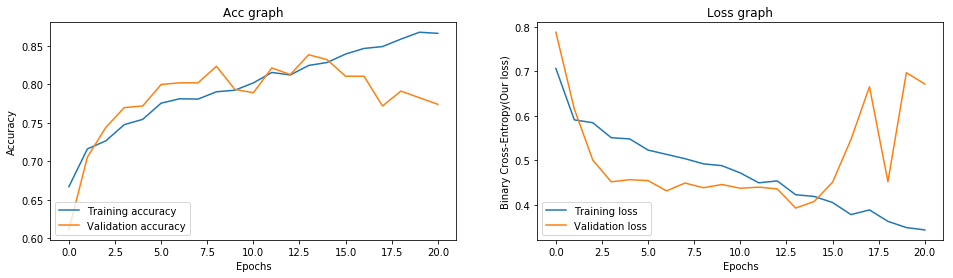

In [0]:
# Training plots
plt.rcParams["figure.figsize"] = (16,4)

train_acc = history_3.history['acc']
valid_acc = history_3.history['val_acc']
train_loss = history_3.history['loss']
valid_loss = history_3.history['val_loss']

plt.subplot(1,2,1)
plt.plot(train_acc,label='Training accuracy')
plt.plot(valid_acc,label='Validation accuracy')
plt.title('Acc graph')
plt.legend(loc='lower left')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')

plt.subplot(1,2,2)
plt.plot(train_loss,label='Training loss')
plt.plot(valid_loss,label='Validation loss')
plt.title('Loss graph')
plt.legend(loc='lower left')
plt.ylabel('Binary Cross-Entropy(Our loss)')
plt.xlabel('Epochs')

plt.show()

In [0]:
del VGG19_best_dropout

In [0]:
VGG19_best_dropout = load_model('VGG19_best1_2_do_model.h5')

In [0]:
# Try to evaluate our model at this stage before making changes and then re-fitting our model
evaluation = VGG19_best_dropout.evaluate_generator(generator=validGen,steps=len(valid_image_list)/BATCH_SIZE,workers=0)
print('Evaluation loss =',evaluation[0])
print('Evaluation accuracy =',evaluation[1]*100)

Evaluation loss = 0.3991916586634933
Evaluation accuracy = 83.22580610552141


In [0]:
# Get predictions from our model
predictions = VGG19_best_dropout.predict_generator(validGen,steps=len(valid_image_list)/BATCH_SIZE,workers=0)

In [0]:
# Get binary predictions using a threshold
threshold = 0.5
for pred in predictions.T.tolist():
  predictions = pred
  
predictions_binary = []

for prediction in predictions:
  if prediction < threshold:
    predictions_binary.append(0)
  else:
    predictions_binary.append(1)

#predictions_binary

In [0]:
# Get the classification report
from sklearn.metrics import classification_report

report = classification_report(predictions_binary,valid_label_list)
print(report)

              precision    recall  f1-score   support

           0       0.61      0.49      0.54       292
           1       0.35      0.47      0.40       173

   micro avg       0.48      0.48      0.48       465
   macro avg       0.48      0.48      0.47       465
weighted avg       0.51      0.48      0.49       465



In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!pip install -U -q PyDrive


    100% |████████████████████████████████| 993kB 23.5MB/s 


In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# 2. Save Keras Model or weights on google drive

# create on Colab directory
#VGG16_model.save('VGG19_.h5') 
model_list=['VGG19_best1_model.h5','VGG19_best1_0_model.h5', 'VGG19_best1_0_e_model.h5', 'VGG19_best1_1_model.h5','VGG19_best1_2_do_model.h5']
for mod in model_list:
  model_file = drive.CreateFile({'title' : mod})
  model_file.SetContentFile(mod)
  model_file.Upload()

  # download to google drive
  drive.CreateFile({'id': model_file.get('id')})

In [0]:
# Training the best Dropout model with lower learning rate and unfreezing one more block
from keras.models import load_model
VGG19_Best = load_model('/content/gdrive/My Drive/VGG19_best1_2_do_model.h5')

In [0]:
# Try to unfreeze the top 10 layers and train with a smaller learning rate
# Freeze the layers except the last 4 layers

conv_base_4 = VGG19_Best.layers[-7]
conv_base_4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 448, 448, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 448, 448, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 448, 448, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 224, 224, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 224, 224, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 224, 224, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 112, 112, 128)     0         
__________

In [0]:
for layer in conv_base_4.layers:
    layer.trainable = True
for layer in conv_base_4.layers[:-15]:
    layer.trainable = False
 
# Check the trainable status of the individual layers
for layer in conv_base_4.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f6c659656d8> False
<keras.layers.convolutional.Conv2D object at 0x7f6c65965438> False
<keras.layers.convolutional.Conv2D object at 0x7f6c65965f28> False
<keras.layers.pooling.MaxPooling2D object at 0x7f6c65965080> False
<keras.layers.convolutional.Conv2D object at 0x7f6c659651d0> False
<keras.layers.convolutional.Conv2D object at 0x7f6c658ac2b0> False
<keras.layers.pooling.MaxPooling2D object at 0x7f6c658ac860> False
<keras.layers.convolutional.Conv2D object at 0x7f6c658ac780> True
<keras.layers.convolutional.Conv2D object at 0x7f6c658acc18> True
<keras.layers.convolutional.Conv2D object at 0x7f6c65833940> True
<keras.layers.convolutional.Conv2D object at 0x7f6c65833748> True
<keras.layers.pooling.MaxPooling2D object at 0x7f6c658336d8> True
<keras.layers.convolutional.Conv2D object at 0x7f6c65833630> True
<keras.layers.convolutional.Conv2D object at 0x7f6c65833ef0> True
<keras.layers.convolutional.Conv2D object at 0x7f6c65833f60> True
<

In [0]:
# Set callback functions to early stop training and save the best model so far
from keras.callbacks import EarlyStopping, ModelCheckpoint
VGG19_Best.compile(loss='binary_crossentropy',optimizer=optimizers.Adam(lr=0.00002),metrics=['acc'])
callbacks = [EarlyStopping(monitor='val_loss', patience=7),ModelCheckpoint(filepath='VGG19_best1_2_do1_model.h5', monitor='val_acc', save_best_only=True)]

EPOCHS = 25
history_4 = VGG19_Best.fit_generator(generator=trainGen,steps_per_epoch=len(train_image_list)/BATCH_SIZE,epochs=EPOCHS,validation_data=validGen,validation_steps=len(valid_image_list)/BATCH_SIZE,class_weight=[weight_0,weight_1],callbacks=callbacks,workers=0)

Epoch 1/25
494/493 [==============================] - 448s 907ms/step - loss: 0.4617 - acc: 0.8150 - val_loss: 0.5651 - val_acc: 0.7957
Epoch 2/25
494/493 [==============================] - 423s 857ms/step - loss: 0.4551 - acc: 0.8077 - val_loss: 0.4313 - val_acc: 0.8022
Epoch 3/25
494/493 [==============================] - 423s 856ms/step - loss: 0.4317 - acc: 0.8233 - val_loss: 0.4330 - val_acc: 0.8215
Epoch 4/25
494/493 [==============================] - 423s 857ms/step - loss: 0.4099 - acc: 0.8358 - val_loss: 0.4938 - val_acc: 0.7978
Epoch 5/25
494/493 [==============================] - 422s 854ms/step - loss: 0.3969 - acc: 0.8354 - val_loss: 0.5213 - val_acc: 0.8129
Epoch 6/25
494/493 [==============================] - 423s 857ms/step - loss: 0.3972 - acc: 0.8403 - val_loss: 0.4893 - val_acc: 0.7892
Epoch 7/25
494/493 [==============================] - 424s 859ms/step - loss: 0.3905 - acc: 0.8460 - val_loss: 0.4454 - val_acc: 0.8151
Epoch 8/25
494/493 [============================

In [0]:
del VGG19_Best

In [0]:
VGG19_Best = load_model('VGG19_best1_2_do1_model.h5')

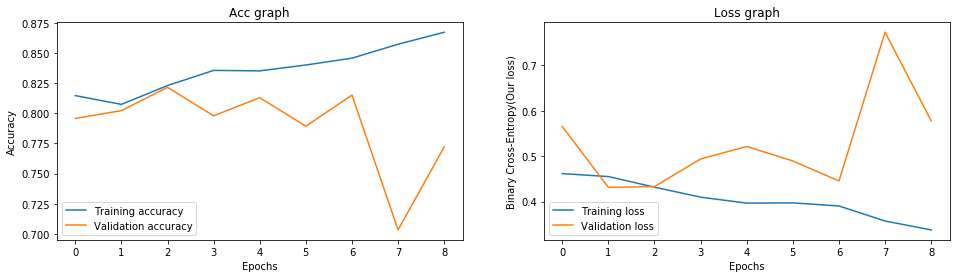

In [0]:
# Training plots
plt.rcParams["figure.figsize"] = (16,4)

train_acc = history_4.history['acc']
valid_acc = history_4.history['val_acc']
train_loss = history_4.history['loss']
valid_loss = history_4.history['val_loss']

plt.subplot(1,2,1)
plt.plot(train_acc,label='Training accuracy')
plt.plot(valid_acc,label='Validation accuracy')
plt.title('Acc graph')
plt.legend(loc='lower left')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')

plt.subplot(1,2,2)
plt.plot(train_loss,label='Training loss')
plt.plot(valid_loss,label='Validation loss')
plt.title('Loss graph')
plt.legend(loc='lower left')
plt.ylabel('Binary Cross-Entropy(Our loss)')
plt.xlabel('Epochs')

plt.show()

In [0]:
# Add dropout between the flatten - fc1 and fc1 - fc2 layers
# https://stackoverflow.com/questions/42475381/add-dropout-layers-between-pretrained-dense-layers-in-keras
from keras.layers import Dropout
from keras.models import Model

#VGG16_best.layers[:-2]

# Define the dropout layers
dropout1 = Dropout(rate=0.3)
dropout2 = Dropout(rate=0.3)

# Store the previous layers
till_pooling = VGG19_Best.layers[-5]
second_last_dense_layer = VGG19_Best.layers[-3]
last_dense_layer = VGG19_Best.layers[-1]

# Reconnect the layers
x = dropout1(till_pooling.output)
x = second_last_dense_layer(x)
x = dropout2(x)
predictors = last_dense_layer(x)

# Create a new model
VGG19_Best_increase_dropout = Model(input=VGG19_Best.input, output=predictors)

# Compile the model
VGG19_Best_increase_dropout.compile(loss='binary_crossentropy',optimizer=optimizers.Adam(lr=1e-6),metrics=['acc'])

VGG19_Best_increase_dropout.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_3_input  (None, 448, 448, 3)       0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 448, 448, 3)       12        
_________________________________________________________________
vgg19 (Model)                (None, 14, 14, 512)       20024384  
_________________________________________________________________
global_average_pooling2d_2 ( (None, 512)               0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("ba..., outputs=Tensor("de...)`


In [0]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
#VGG19_Best.compile(loss='binary_crossentropy',optimizer=optimizers.Adam(lr=0.00002),metrics=['acc'])
callbacks = [EarlyStopping(monitor='val_loss', patience=7),ModelCheckpoint(filepath='VGG19_best1_2_do2_model.h5', monitor='val_acc', save_best_only=True)]

EPOCHS = 25
history_4 = VGG19_Best_increase_dropout.fit_generator(generator=trainGen,steps_per_epoch=len(train_image_list)/BATCH_SIZE,epochs=EPOCHS,validation_data=validGen,validation_steps=len(valid_image_list)/BATCH_SIZE,class_weight=[weight_0,weight_1],callbacks=callbacks,workers=0)

Epoch 1/25
494/493 [==============================] - 424s 858ms/step - loss: 0.3533 - acc: 0.8510 - val_loss: 0.4281 - val_acc: 0.8473
Epoch 2/25
494/493 [==============================] - 423s 857ms/step - loss: 0.3268 - acc: 0.8666 - val_loss: 0.4249 - val_acc: 0.8301
Epoch 3/25
494/493 [==============================] - 425s 860ms/step - loss: 0.3106 - acc: 0.8761 - val_loss: 0.4171 - val_acc: 0.8516
Epoch 4/25
494/493 [==============================] - 424s 859ms/step - loss: 0.3028 - acc: 0.8775 - val_loss: 0.4580 - val_acc: 0.8366
Epoch 5/25
494/493 [==============================] - 424s 858ms/step - loss: 0.2979 - acc: 0.8824 - val_loss: 0.4274 - val_acc: 0.8581
Epoch 6/25
494/493 [==============================] - 424s 858ms/step - loss: 0.2891 - acc: 0.8838 - val_loss: 0.4307 - val_acc: 0.8495
Epoch 7/25
494/493 [==============================] - 427s 865ms/step - loss: 0.2863 - acc: 0.8842 - val_loss: 0.4398 - val_acc: 0.8280
Epoch 8/25
494/493 [============================

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# 2. Save Keras Model or weights on google drive

# create on Colab directory
#VGG16_model.save('VGG19_.h5') 
model_list=['VGG19_best1_2_do1_model.h5','VGG19_best1_2_do2_model.h5']
for mod in model_list:
  model_file = drive.CreateFile({'title' : mod})
  model_file.SetContentFile(mod)
  model_file.Upload()

  # download to google drive
  drive.CreateFile({'id': model_file.get('id')})

In [0]:
del VGG19_Best_increase_dropout

In [0]:
VGG19_Best = load_model('VGG19_best1_2_do2_model.h5')

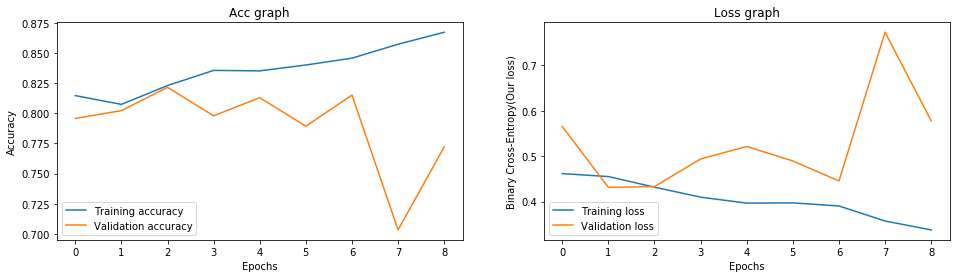

In [0]:
# Training plots
plt.rcParams["figure.figsize"] = (16,4)

train_acc = history_4.history['acc']
valid_acc = history_4.history['val_acc']
train_loss = history_4.history['loss']
valid_loss = history_4.history['val_loss']

plt.subplot(1,2,1)
plt.plot(train_acc,label='Training accuracy')
plt.plot(valid_acc,label='Validation accuracy')
plt.title('Acc graph')
plt.legend(loc='lower left')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')

plt.subplot(1,2,2)
plt.plot(train_loss,label='Training loss')
plt.plot(valid_loss,label='Validation loss')
plt.title('Loss graph')
plt.legend(loc='lower left')
plt.ylabel('Binary Cross-Entropy(Our loss)')
plt.xlabel('Epochs')

plt.show()

In [0]:
from keras.models import load_model

In [0]:
VGG19_Best = load_model('VGG19_best1_2_do2_model.h5')

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [0]:
# Add dropout between the flatten - fc1 and fc1 - fc2 layers
# https://stackoverflow.com/questions/42475381/add-dropout-layers-between-pretrained-dense-layers-in-keras
from keras.layers import Dropout
from keras.models import Model

#VGG16_best.layers[:-2]

# Define the dropout layers
dropout1 = Dropout(rate=0.35)
dropout2 = Dropout(rate=0.35)

# Store the previous layers
till_pooling = VGG19_Best.layers[-5]
second_last_dense_layer = VGG19_Best.layers[-3]
last_dense_layer = VGG19_Best.layers[-1]

# Reconnect the layers
x = dropout1(till_pooling.output)
x = second_last_dense_layer(x)
x = dropout2(x)
predictors = last_dense_layer(x)

# Create a new model
VGG19_Best_increase_dropout = Model(input=VGG19_Best.input, output=predictors)

# Compile the model
VGG19_Best_increase_dropout.compile(loss='binary_crossentropy',optimizer=optimizers.Adam(lr=1e-6),metrics=['acc'])

VGG19_Best_increase_dropout.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_3_input  (None, 448, 448, 3)       0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 448, 448, 3)       12        
_________________________________________________________________
vgg19 (Model)                (None, 14, 14, 512)       20024384  
_________________________________________________________________
global_average_pooling2d_2 ( (None, 512)               0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("ba..., outputs=Tensor("de...)`


In [0]:
conv_base_5 = VGG19_Best_increase_dropout.layers[-7]
# for layer in conv_base_5.layers:
#     layer.trainable = True
# for layer in conv_base_4.layers[:-15]:
#     layer.trainable = False
 
# Check the trainable status of the individual layers
for layer in conv_base_5.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f0d5ed06c18> False
<keras.layers.convolutional.Conv2D object at 0x7f0d5ed06d68> False
<keras.layers.convolutional.Conv2D object at 0x7f0d5ed12080> False
<keras.layers.pooling.MaxPooling2D object at 0x7f0d5ed12320> False
<keras.layers.convolutional.Conv2D object at 0x7f0d5ed123c8> False
<keras.layers.convolutional.Conv2D object at 0x7f0d5ed12550> False
<keras.layers.pooling.MaxPooling2D object at 0x7f0d5ed126d8> False
<keras.layers.convolutional.Conv2D object at 0x7f0d5ed12780> True
<keras.layers.convolutional.Conv2D object at 0x7f0d5ed12908> True
<keras.layers.convolutional.Conv2D object at 0x7f0d5ed12a90> True
<keras.layers.convolutional.Conv2D object at 0x7f0d5ed12c18> True
<keras.layers.pooling.MaxPooling2D object at 0x7f0d5ed12da0> True
<keras.layers.convolutional.Conv2D object at 0x7f0d5ed12e48> True
<keras.layers.convolutional.Conv2D object at 0x7f0d5ed06f60> True
<keras.layers.convolutional.Conv2D object at 0x7f0d5ec9a198> True
<

In [0]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
#VGG19_Best.compile(loss='binary_crossentropy',optimizer=optimizers.Adam(lr=0.00002),metrics=['acc'])
callbacks = [EarlyStopping(monitor='val_loss', patience=7),ModelCheckpoint(filepath='VGG19_best1_2_do3_model.h5', monitor='val_acc', save_best_only=True)]

EPOCHS = 25
history_5 = VGG19_Best_increase_dropout.fit_generator(generator=trainGen,steps_per_epoch=len(train_image_list)/BATCH_SIZE,epochs=EPOCHS,validation_data=validGen,validation_steps=len(valid_image_list)/BATCH_SIZE,class_weight=[weight_0,weight_1],callbacks=callbacks,workers=0)

Epoch 1/25
494/493 [==============================] - 464s 940ms/step - loss: 0.3123 - acc: 0.8783 - val_loss: 0.4241 - val_acc: 0.8452
Epoch 2/25
494/493 [==============================] - 437s 885ms/step - loss: 0.3048 - acc: 0.8802 - val_loss: 0.4289 - val_acc: 0.8495
Epoch 3/25
494/493 [==============================] - 438s 886ms/step - loss: 0.3021 - acc: 0.8773 - val_loss: 0.4298 - val_acc: 0.8452
Epoch 4/25
494/493 [==============================] - 438s 887ms/step - loss: 0.2938 - acc: 0.8846 - val_loss: 0.4179 - val_acc: 0.8452
Epoch 5/25
494/493 [==============================] - 439s 888ms/step - loss: 0.2844 - acc: 0.8895 - val_loss: 0.4261 - val_acc: 0.8409
Epoch 6/25
494/493 [==============================] - 437s 885ms/step - loss: 0.2750 - acc: 0.8903 - val_loss: 0.4253 - val_acc: 0.8452
Epoch 7/25
494/493 [==============================] - 439s 888ms/step - loss: 0.2741 - acc: 0.8939 - val_loss: 0.4274 - val_acc: 0.8409
Epoch 8/25
494/493 [============================

In [0]:
del VGG19_Best_increase_dropout

In [0]:
VGG19_Best = load_model('VGG19_best1_2_do2_model.h5')

In [0]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
VGG19_Best.compile(loss='binary_crossentropy',optimizer=optimizers.Adam(lr=0.0000001),metrics=['acc'])
callbacks = [EarlyStopping(monitor='val_loss', patience=7),ModelCheckpoint(filepath='VGG19_best1_2_do4_model.h5', monitor='val_acc', save_best_only=True)]

EPOCHS = 25
history_6 = VGG19_Best.fit_generator(generator=trainGen,steps_per_epoch=len(train_image_list)/BATCH_SIZE,epochs=EPOCHS,validation_data=validGen,validation_steps=len(valid_image_list)/BATCH_SIZE,class_weight=[weight_0,weight_1],callbacks=callbacks,workers=0)

Epoch 1/25
494/493 [==============================] - 439s 888ms/step - loss: 0.3112 - acc: 0.8731 - val_loss: 0.4258 - val_acc: 0.8301
Epoch 2/25
494/493 [==============================] - 438s 886ms/step - loss: 0.3110 - acc: 0.8747 - val_loss: 0.4238 - val_acc: 0.8495
Epoch 3/25
494/493 [==============================] - 437s 884ms/step - loss: 0.3075 - acc: 0.8753 - val_loss: 0.4358 - val_acc: 0.8409
Epoch 4/25
494/493 [==============================] - 437s 885ms/step - loss: 0.3056 - acc: 0.8765 - val_loss: 0.4108 - val_acc: 0.8538
Epoch 5/25
494/493 [==============================] - 437s 885ms/step - loss: 0.3084 - acc: 0.8729 - val_loss: 0.4202 - val_acc: 0.8387
Epoch 6/25
494/493 [==============================] - 436s 883ms/step - loss: 0.3037 - acc: 0.8804 - val_loss: 0.4219 - val_acc: 0.8452
Epoch 7/25
494/493 [==============================] - 438s 886ms/step - loss: 0.3009 - acc: 0.8802 - val_loss: 0.4321 - val_acc: 0.8366
Epoch 8/25
494/493 [============================

KeyboardInterrupt: ignored

In [0]:
#training on a new built model
#Trial for loading model
from keras.models import load_model

VGG19_New = load_model('VGG19New0.h5')



/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:327: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [0]:
# Add dropout between the flatten - fc1 and fc1 - fc2 layers
# https://stackoverflow.com/questions/42475381/add-dropout-layers-between-pretrained-dense-layers-in-keras
from keras.layers import Dropout
from keras.models import Model

#VGG16_best.layers[:-2]

# Define the dropout layers
dropout1 = Dropout(rate = 0.25)
dropout2 = Dropout(rate = 0.25)

# Store the previous layers
till_pooling = VGG19_New.layers[-3]
second_last_dense_layer = VGG19_New.layers[-2]
last_dense_layer = VGG19_New.layers[-1]

# Reconnect the layers
x = dropout1(till_pooling.output)
x = second_last_dense_layer(x)
x = dropout2(x)
predictors = last_dense_layer(x)

# Create a new model
VGG19_new_dropout = Model(input=VGG19_New.input, output=predictors)

# Compile the model
VGG19_new_dropout.compile(loss='binary_crossentropy',optimizer=optimizers.Adam(lr=0.00002),metrics=['acc'])

VGG19_new_dropout.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1_input  (None, 512, 512, 3)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 512, 512, 3)       12        
_________________________________________________________________
vgg19 (Model)                (None, 16, 16, 512)       20024384  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("ba..., outputs=Tensor("de...)`


In [0]:
conv_base_0 = VGG19_new_dropout.layers[-7]
for layer in conv_base_0.layers:
    layer.trainable = True
for layer in conv_base_0.layers[:-10]:
    layer.trainable = False
 
# Check the trainable status of the individual layers
for layer in conv_base_0.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f0afda3ae80> False
<keras.layers.convolutional.Conv2D object at 0x7f0afda33390> False
<keras.layers.convolutional.Conv2D object at 0x7f0afd989550> False
<keras.layers.pooling.MaxPooling2D object at 0x7f0afd901940> False
<keras.layers.convolutional.Conv2D object at 0x7f0afd901908> False
<keras.layers.convolutional.Conv2D object at 0x7f0afd9016d8> False
<keras.layers.pooling.MaxPooling2D object at 0x7f0afd929080> False
<keras.layers.convolutional.Conv2D object at 0x7f0afd929128> False
<keras.layers.convolutional.Conv2D object at 0x7f0afd9292b0> False
<keras.layers.convolutional.Conv2D object at 0x7f0afd929438> False
<keras.layers.convolutional.Conv2D object at 0x7f0afd9295c0> False
<keras.layers.pooling.MaxPooling2D object at 0x7f0afd929748> False
<keras.layers.convolutional.Conv2D object at 0x7f0afd9297f0> True
<keras.layers.convolutional.Conv2D object at 0x7f0afd929978> True
<keras.layers.convolutional.Conv2D object at 0x7f0afd929b00> T

In [0]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [EarlyStopping(monitor='val_loss', patience=7),ModelCheckpoint(filepath='VGG19New1.h5', monitor='val_acc', save_best_only=True)]

EPOCHS = 25
history_new = VGG19_new_dropout.fit_generator(generator=trainGen,steps_per_epoch=len(train_image_list)/BATCH_SIZE,epochs=EPOCHS,validation_data=validGen,validation_steps=len(valid_image_list)/BATCH_SIZE,class_weight=[weight_0,weight_1],callbacks=callbacks,workers=0)

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Epoch 1/25
494/493 [==============================] - 685s 1s/step - loss: 0.5614 - acc: 0.7366 - val_loss: 0.6135 - val_acc: 0.7355
Epoch 2/25
494/493 [==============================] - 646s 1s/step - loss: 0.4965 - acc: 0.7794 - val_loss: 0.4329 - val_acc: 0.8151
Epoch 3/25
494/493 [==============================] - 649s 1s/step - loss: 0.4660 - acc: 0.7953 - val_loss: 0.7844 - val_acc: 0.6946
Epoch 4/25
494/493 [==============================] - 649s 1s/step - loss: 0.4414 - acc: 0.8071 - val_loss: 0.4120 - val_acc: 0.8108
Epoch 5/25
494/493 [==============================] - 652s 1s/step - loss: 0.4275 - acc: 0.8134 - val_loss: 0.5384 - val_acc: 0.7742
Epoch 6/25
494/493 [==============================] - 652s 1s/step - loss: 0.4075 - acc: 0.8263 - val_loss: 0.4108 - val_acc: 0.8022
Epoch 7/25
494/493 [==============================] - 651s 1s/step - loss: 0.3887 - acc: 0.8352 - val_loss: 0.3873 - val_acc: 0.8151
Epoch 8/25
494/493 [==============================] - 651s 1s/step - 

In [0]:
del VGG19_new_dropout1

In [0]:
VGG19_New = load_model('VGG19New1.h5')

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:327: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [0]:
# Add dropout between the flatten - fc1 and fc1 - fc2 layers
# https://stackoverflow.com/questions/42475381/add-dropout-layers-between-pretrained-dense-layers-in-keras
from keras.layers import Dropout
from keras.models import Model

#VGG16_best.layers[:-2]

# Define the dropout layers
dropout1 = Dropout(rate = 0.40)
dropout2 = Dropout(rate = 0.40)

# Store the previous layers
till_pooling = VGG19_New.layers[-5]
second_last_dense_layer = VGG19_New.layers[-3]
last_dense_layer = VGG19_New.layers[-1]

# Reconnect the layers
x = dropout1(till_pooling.output)
x = second_last_dense_layer(x)
x = dropout2(x)
predictors = last_dense_layer(x)

# Create a new model
VGG19_new_dropout1 = Model(input=VGG19_New.input, output=predictors)

# Compile the model
VGG19_new_dropout1.compile(loss='binary_crossentropy',optimizer=optimizers.Adam(lr=0.00002),metrics=['acc'])

VGG19_new_dropout1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1_input  (None, 512, 512, 3)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 512, 512, 3)       12        
_________________________________________________________________
vgg19 (Model)                (None, 16, 16, 512)       20024384  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("ba..., outputs=Tensor("de...)`


In [0]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [EarlyStopping(monitor='val_loss', patience=7),ModelCheckpoint(filepath='VGG19New2.h5', monitor='val_acc', save_best_only=True)]

EPOCHS = 25
history_new_1 = VGG19_new_dropout1.fit_generator(generator=trainGen,steps_per_epoch=len(train_image_list)/BATCH_SIZE,epochs=EPOCHS,validation_data=validGen,validation_steps=len(valid_image_list)/BATCH_SIZE,class_weight=[weight_0,weight_1],callbacks=callbacks,workers=0)

Epoch 1/25
494/493 [==============================] - 518s 1s/step - loss: 0.3468 - acc: 0.8518 - val_loss: 0.4592 - val_acc: 0.7978
Epoch 2/25
494/493 [==============================] - 527s 1s/step - loss: 0.3360 - acc: 0.8636 - val_loss: 0.4360 - val_acc: 0.8086
Epoch 3/25
494/493 [==============================] - 526s 1s/step - loss: 0.3054 - acc: 0.8715 - val_loss: 0.4908 - val_acc: 0.8172
Epoch 4/25
494/493 [==============================] - 527s 1s/step - loss: 0.2946 - acc: 0.8802 - val_loss: 0.4203 - val_acc: 0.8215
Epoch 5/25
494/493 [==============================] - 525s 1s/step - loss: 0.2638 - acc: 0.8901 - val_loss: 0.5070 - val_acc: 0.8172
Epoch 6/25
494/493 [==============================] - 525s 1s/step - loss: 0.2408 - acc: 0.8974 - val_loss: 0.5226 - val_acc: 0.8215
Epoch 7/25
494/493 [==============================] - 524s 1s/step - loss: 0.2421 - acc: 0.8988 - val_loss: 0.4618 - val_acc: 0.8301
Epoch 8/25
494/493 [==============================] - 523s 1s/step - 

In [0]:
del conv_base_0

In [0]:
del VGG19_new_dropout1

In [0]:
VGG19_New = load_model('VGG19New1.h5')

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:327: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [0]:
# Add dropout between the flatten - fc1 and fc1 - fc2 layers
# https://stackoverflow.com/questions/42475381/add-dropout-layers-between-pretrained-dense-layers-in-keras
from keras.layers import Dropout
from keras.models import Model

#VGG16_best.layers[:-2]

# Define the dropout layers
dropout1 = Dropout(rate = 0.40)
dropout2 = Dropout(rate = 0.40)

# Store the previous layers
till_pooling = VGG19_New.layers[-5]
second_last_dense_layer = VGG19_New.layers[-3]
last_dense_layer = VGG19_New.layers[-1]

# Reconnect the layers
x = dropout1(till_pooling.output)
x = second_last_dense_layer(x)
x = dropout2(x)
predictors = last_dense_layer(x)

# Create a new model
VGG19_new_dropout1 = Model(input=VGG19_New.input, output=predictors)

# Compile the model
VGG19_new_dropout1.compile(loss='binary_crossentropy',optimizer=optimizers.Adam(lr=0.00002),metrics=['acc'])

VGG19_new_dropout1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1_input  (None, 512, 512, 3)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 512, 512, 3)       12        
_________________________________________________________________
vgg19 (Model)                (None, 16, 16, 512)       20024384  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("ba..., outputs=Tensor("de...)`


In [0]:
conv_base_0 = VGG19_new_dropout.layers[-7]
for layer in conv_base_0.layers:
    layer.trainable = True
for layer in conv_base_0.layers[:-15]:
    layer.trainable = False
 
# Check the trainable status of the individual layers
for layer in conv_base_0.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f0afda3ae80> False
<keras.layers.convolutional.Conv2D object at 0x7f0afda33390> False
<keras.layers.convolutional.Conv2D object at 0x7f0afd989550> False
<keras.layers.pooling.MaxPooling2D object at 0x7f0afd901940> False
<keras.layers.convolutional.Conv2D object at 0x7f0afd901908> False
<keras.layers.convolutional.Conv2D object at 0x7f0afd9016d8> False
<keras.layers.pooling.MaxPooling2D object at 0x7f0afd929080> False
<keras.layers.convolutional.Conv2D object at 0x7f0afd929128> True
<keras.layers.convolutional.Conv2D object at 0x7f0afd9292b0> True
<keras.layers.convolutional.Conv2D object at 0x7f0afd929438> True
<keras.layers.convolutional.Conv2D object at 0x7f0afd9295c0> True
<keras.layers.pooling.MaxPooling2D object at 0x7f0afd929748> True
<keras.layers.convolutional.Conv2D object at 0x7f0afd9297f0> True
<keras.layers.convolutional.Conv2D object at 0x7f0afd929978> True
<keras.layers.convolutional.Conv2D object at 0x7f0afd929b00> True
<